**AutoML OSS入門（7）**

# ディープラーニングモデルを自動構築するAutoML OSS「AutoKeras」

本ノートブックの紹介記事と併せてご覧ください。
- [＠IT連載 AutoML OSS入門（７）- 第7回「ディープラーニングモデルを自動構築するAutoML OSS「AutoKeras」」](https://atmarkit.itmedia.co.jp/ait/articles/2112/13/news006.html)

また、ノートブックの扱い方やタイタニックの生存予測データについては、連載記事の第1回を参照してください。
- [＠IT連載 AutoML OSS入門（１）- 第1回「機械学習モデル構築作業の煩雑さを解消する「AutoML」とは――歴史、動向、利用のメリットを整理する」](https://www.atmarkit.co.jp/ait/articles/2107/02/news006.html)

## タイタニックデータでAutoML
タイタニックの生存予測データを使って、AutoKerasを紹介していきます。

### セットアップ
AutoKerasをインストールします。

In [ ]:
# インストール
!pip install autokeras

     |████████████████████████████████| 166 kB 5.4 MB/s 
     |████████████████████████████████| 454.4 MB 21 kB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 1.2 MB 47.2 MB/s 
     |████████████████████████████████| 4.0 MB 52.8 MB/s 
     |████████████████████████████████| 462 kB 45.1 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


### ライブラリのインポート

In [ ]:
import autokeras as ak

# autokerasのバージョンを確認
print(ak.__version__)

1.0.16.post1


### データのダウンロード
タイタニックの生存予測データをダウンロードします。<br>
第1回記事の「タイタニックの生存予測データの取得方法と解説」を参照してください。

In [ ]:
# データの準備
!wget -N https://github.com/aiq2020-tw/automl-notebooks/raw/main/titanic.zip
!unzip titanic.zip

--2021-11-05 13:51:51--  https://github.com/aiq2020-tw/automl-notebooks/raw/main/titanic.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aiq2020-tw/automl-notebooks/main/titanic.zip [following]
--2021-11-05 13:51:51--  https://raw.githubusercontent.com/aiq2020-tw/automl-notebooks/main/titanic.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34877 (34K) [application/zip]
Saving to: ‘titanic.zip’

titanic.zip         100%[===================>]  34.06K  --.-KB/s    in 0.003s  

Last-modified header missing -- time-stamps turned off.
2021-11-05 13:51:51 (12.8 MB/s) - ‘titanic.zip’ saved [3487

構造化データの学習を行う際には、fit()の引数にファイル名を渡すとデータのロードを行ってくれるので、ここではデータのロードを行ないません。

### モデルの学習
`StructuredDataClassifier`クラスを使ってモデルを学習します。

In [ ]:
# モデルの学習
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=10, seed=42)
clf.fit('train.csv', 'Survived')

Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.3032258152961731

Best val_accuracy So Far: 0.8451613187789917
Total elapsed time: 00h 00m 49s
INFO:tensorflow:Oracle triggered exit
Epoch 1/18
28/28 [==============================] - 1s 2ms/step - loss: 0.6239 - accuracy: 0.6352
Epoch 2/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7991
Epoch 3/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8092
Epoch 4/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8103
Epoch 5/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8148
Epoch 6/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8148
Epoch 7/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8182
Epoch 8/18
28/28 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8227
Epoch 9/18
28/28 [=================

学習したモデルをエクスポートして、モデルの構造を表示して確認します。

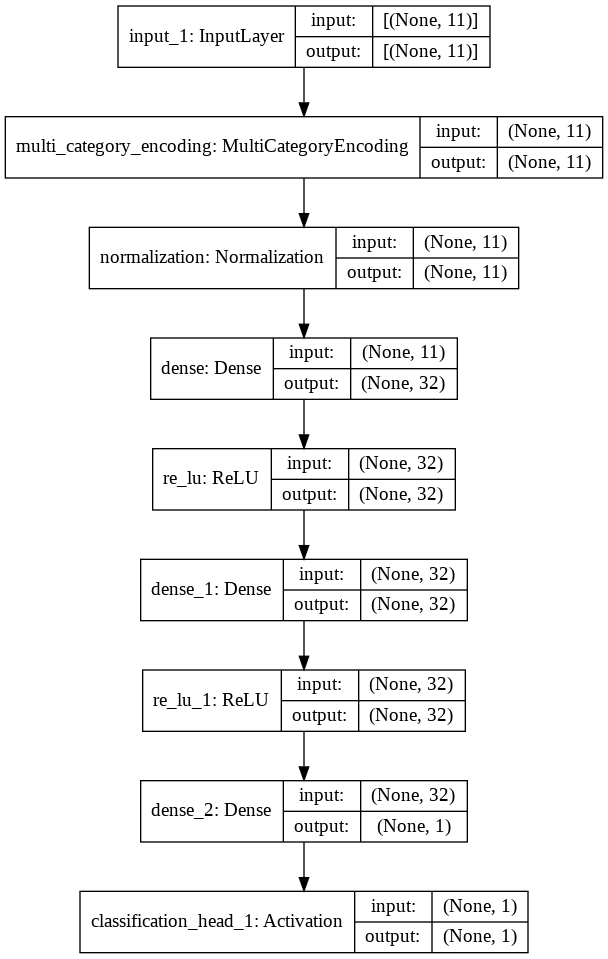

In [ ]:
from tensorflow.keras.utils import plot_model

model = clf.export_model()
plot_model(model, show_shapes=True, show_layer_names=True)

### 予測
学習したモデルでテストデータの予測を行います。

そして、Kaggleへ提出するため、結果をcsvファイルに出力します。

In [ ]:
import pandas as pd
# データのロード
test_df = pd.read_csv('test.csv')
# 予測
test_df['Survived'] = clf.predict(test_df)
print(test_df['Survived'].astype(int))
# csvファイル作成
test_df[['PassengerId','Survived']].astype(int).to_csv('submission.csv', 
                                                       index=None)

14/14 [==============================] - 0s 2ms/step
0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


### モデルの保存と利用
AutoKerasの学習済みモデルを保存します。

保存したモデルは、tf.kerasのload_model()で読み込んで使用できます。


In [ ]:
# モデルの保存
model.save('autokeras_model', save_format='tf')

INFO:tensorflow:Assets written to: autokeras_model/assets


In [ ]:
from tensorflow.keras.models import load_model
# モデルの読み込み
loaded_model = load_model('autokeras_model', custom_objects=ak.CUSTOM_OBJECTS)
# モデル構造の確認
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 11)                0         
_________________________________________________________________
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense (Dense)                (None, 32)                384       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

以上で、タイタニックの生存予測データを使ったAutoKerasの紹介は終わりです。